# Importaciones

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import re

# Carga de datos

In [2]:
# Cargar los datos
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
sample_df = pd.read_csv('data/sample_submission.csv')

# Primeras exploraciones

In [3]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           391 non-null    int64  
 1   Price_euros  391 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.2 KB


In [4]:
train_df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,697,705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,669.0
1,435,442,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1695.0
2,735,743,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.85kg,779.0
3,864,875,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29kg,2240.0
4,1176,1194,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,825.0


In [5]:
test_df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,824,833,Lenovo,ThinkPad X1,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB Flash Storage,Intel HD Graphics 620,Windows 10,1.13kg
1,101,104,HP,15-bw000nv (E2-9000e/4GB/500GB/Radeon,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,Windows 10,2.1kg
2,1157,1175,Lenovo,ThinkPad T460s,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,12GB,512GB SSD,Intel HD Graphics 520,Windows 7,1.4kg
3,940,954,HP,Omen 17-W006na,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 965M,Windows 10,2.75kg
4,853,864,Lenovo,ThinkPad T470p,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GT 940MX,Windows 10,1.96kg


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                391 non-null    int64  
 1   laptop_ID         391 non-null    int64  
 2   Company           391 non-null    object 
 3   Product           391 non-null    object 
 4   TypeName          391 non-null    object 
 5   Inches            391 non-null    float64
 6   ScreenResolution  391 non-null    object 
 7   Cpu               391 non-null    object 
 8   Ram               391 non-null    object 
 9   Memory            391 non-null    object 
 10  Gpu               391 non-null    object 
 11  OpSys             391 non-null    object 
 12  Weight            391 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 39.8+ KB


In [8]:
train_df.describe()

,id,laptop_ID,Inches,Price_euros
count,912.000000,912.000000,912.000000,912.00000
mean,652.099781,661.273026,15.060746,1126.92034
std,375.428905,380.297415,1.412363,696.08887
min,0.000000,1.000000,10.100000,174.00000
25%,332.500000,338.500000,14.000000,589.00000
50%,655.500000,663.500000,15.600000,952.00000
75%,980.500000,994.500000,15.600000,1499.00000
max,1301.000000,1319.000000,18.400000,4899.00000


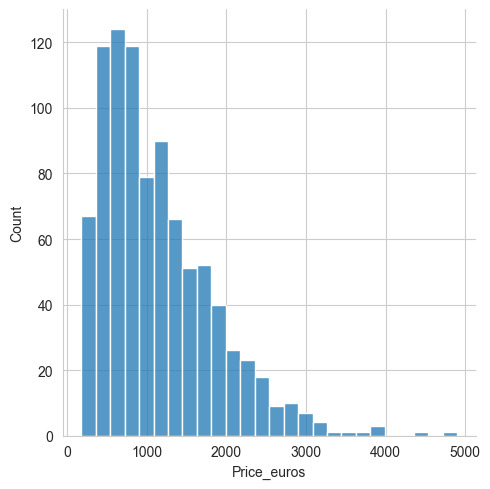

In [9]:
sns.displot(train_df['Price_euros']);

In [10]:
train_df[['Price_euros', 'Inches']].corr()

,Price_euros,Inches
Price_euros,1.000000,0.070152
Inches,0.070152,1.000000


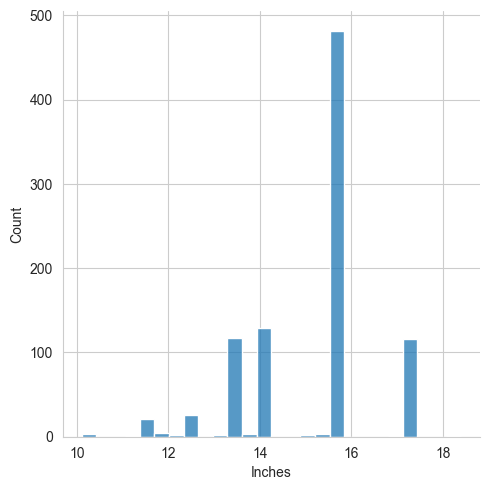

In [11]:
sns.displot(train_df['Inches']);

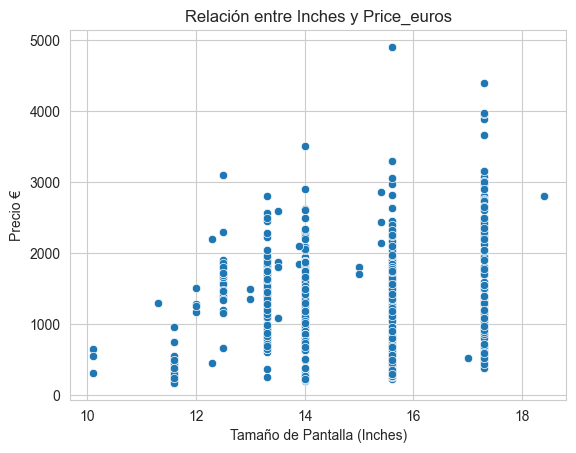

In [12]:
sns.scatterplot(data=train_df, x='Inches', y='Price_euros')
plt.title("Relación entre Inches y Price_euros")
plt.xlabel("Tamaño de Pantalla (Inches)")
plt.ylabel("Precio €")
plt.show()

# Limpieza de datos

In [13]:
train_df['Company'].unique()

array(['Asus', 'Lenovo', 'Dell', 'Mediacom', 'Toshiba', 'HP', 'Acer',
       'Apple', 'MSI', 'Fujitsu', 'Samsung', 'Chuwi', 'Microsoft',
       'Razer', 'Xiaomi', 'Huawei', 'Google', 'Vero', 'LG'], dtype=object)

In [14]:
train_df['Company'].value_counts()

Company
Dell         218
HP           197
Lenovo       193
Asus         110
Acer          76
Toshiba       37
MSI           36
Apple         17
Mediacom       6
Samsung        5
Microsoft      4
Razer          4
Xiaomi         2
Huawei         2
Fujitsu        1
Chuwi          1
Google         1
Vero           1
LG             1
Name: count, dtype: int64

In [15]:
# Cambiar temporalmente el límite de filas mostradas
with pd.option_context('display.max_rows', None):
    print(train_df['Product'].value_counts())

Product
Inspiron 3567                                    24
XPS 13                                           21
Vostro 3568                                      15
250 G6                                           13
Legion Y520-15IKBN                               12
Inspiron 5570                                    12
Alienware 17                                     11
Inspiron 5567                                    11
Inspiron 7567                                    10
Satellite Pro                                    10
Latitude 5580                                    10
ProBook 450                                      10
Aspire 3                                          9
MacBook Pro                                       9
EliteBook 840                                     9
Vostro 5568                                       8
ProBook 650                                       6
ThinkPad X1                                       6
ThinkPad Yoga                                     6
Elit

In [16]:
train_df['TypeName'].value_counts()

TypeName
Notebook              516
Gaming                143
Ultrabook             130
2 in 1 Convertible     84
Workstation            22
Netbook                17
Name: count, dtype: int64

In [17]:
train_df['OpSys'].value_counts()

OpSys
Windows 10      745
No OS            46
Linux            46
Windows 7        33
Chrome OS        18
macOS            11
Mac OS X          6
Windows 10 S      5
Android           2
Name: count, dtype: int64

In [18]:
columns_to_drop = ['laptop_ID', 'Company', 'Product']
train_df = train_df.drop(columns=columns_to_drop)

In [19]:
train_df.head()

,id,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,697,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,669.0
1,435,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1695.0
2,735,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.85kg,779.0
3,864,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29kg,2240.0
4,1176,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,825.0


In [20]:
# Procesar la columna 'Weight' y convertirla a numérico
train_df['Weight'] = train_df['Weight'].str.replace('kg', '').astype(float)
test_df['Weight'] = test_df['Weight'].str.replace('kg', '').astype(float)

# Procesar la columna 'Ram' y convertirla a numérico
train_df['Ram'] = train_df['Ram'].str.replace('GB', '').astype(int)
test_df['Ram'] = test_df['Ram'].str.replace('GB', '').astype(int)

# Extraer la resolución de pantalla y combinarla en una sola columna 'Resolution'
train_df[['res_width', 'res_height']] = train_df['ScreenResolution'].str.extract(r'(\d{3,4})x(\d{3,4})').astype(float)
test_df[['res_width', 'res_height']] = test_df['ScreenResolution'].str.extract(r'(\d{3,4})x(\d{3,4})').astype(float)

# Combinar 'res_width' y 'res_height' en una sola columna 'Resolution'
train_df['Resolution'] = train_df['res_width'] * train_df['res_height']
test_df['Resolution'] = test_df['res_width'] * test_df['res_height']

# Eliminar las columnas 'res_width' y 'res_height' ya que se combinan en 'Resolution'
train_df = train_df.drop(columns=['res_width', 'res_height'])
test_df = test_df.drop(columns=['res_width', 'res_height'])

# Procesar la columna 'Memory' para separar SSD y HDD
def parse_memory_details(memory_str):
    if isinstance(memory_str, str):
        memory_str = memory_str.strip().lower()
        ssd = 0
        hdd = 0
        if 'ssd' in memory_str:
            ssd_match = re.search(r'(\d+\.?\d*)\s*gb ssd|(\d+\.?\d*)\s*tb ssd', memory_str)
            if ssd_match:
                ssd_value = ssd_match.group(1) or ssd_match.group(2)
                ssd = float(ssd_value) * 1024 if 'tb' in memory_str else float(ssd_value)
        if 'hdd' in memory_str:
            hdd_match = re.search(r'(\d+\.?\d*)\s*gb hdd|(\d+\.?\d*)\s*tb hdd', memory_str)
            if hdd_match:
                hdd_value = hdd_match.group(1) or hdd_match.group(2)
                hdd = float(hdd_value) * 1024 if 'tb' in memory_str else float(hdd_value)
        return ssd, hdd
    return 0, 0

# Aplicar la función a la columna 'Memory' para extraer SSD y HDD
train_df[['Memory_SSD', 'Memory_HDD']] = train_df['Memory'].apply(
    lambda x: pd.Series(parse_memory_details(x))
)
test_df[['Memory_SSD', 'Memory_HDD']] = test_df['Memory'].apply(
    lambda x: pd.Series(parse_memory_details(x))
)

# Eliminar la columna original 'Memory' ya que ahora se divide en SSD y HDD
train_df = train_df.drop(columns=['Memory'])
test_df = test_df.drop(columns=['Memory'])

# Procesar la columna 'Cpu' para extraer más detalles
def parse_cpu_details(cpu_str):
    if isinstance(cpu_str, str):
        cpu_str = cpu_str.strip().lower()
        
        # Extraer número de núcleos
        cores = re.search(r'(\d+)\s*core', cpu_str)
        cores = int(cores.group(1)) if cores else 0
        
        # Extraer frecuencia base (GHz)
        frequency = re.search(r'(\d+\.?\d*)\s*ghz', cpu_str)
        frequency = float(frequency.group(1)) if frequency else 0.0
        
        # Identificar familia de CPU (Intel, AMD, etc.)
        if 'intel' in cpu_str:
            family = 'Intel'
        elif 'amd' in cpu_str:
            family = 'AMD'
        else:
            family = 'Other'
        
        # Extraer serie específica (i3, i5, i7, Ryzen 5, etc.)
        series = None
        if 'intel' in cpu_str:
            series = re.search(r'(i\d)', cpu_str)
        elif 'ryzen' in cpu_str:
            series = re.search(r'(ryzen \d)', cpu_str)
        
        series = series.group(1) if series else 'Other'
        
        return cores, frequency, family, series
    return 0, 0.0, 'Other', 'Other'

# Aplicar la función a la columna 'Cpu'
train_df[['Cpu_Cores', 'Cpu_Frequency', 'Cpu_Family', 'Cpu_Series']] = train_df['Cpu'].apply(
    lambda x: pd.Series(parse_cpu_details(x))
)
test_df[['Cpu_Cores', 'Cpu_Frequency', 'Cpu_Family', 'Cpu_Series']] = test_df['Cpu'].apply(
    lambda x: pd.Series(parse_cpu_details(x))
)

# Eliminar la columna original 'Cpu'
train_df = train_df.drop(columns=['Cpu'])
test_df = test_df.drop(columns=['Cpu'])

# Convertir las columnas categóricas 'Cpu_Family' y 'Cpu_Series' a variables dummy
train_df = pd.get_dummies(train_df, columns=['Cpu_Family', 'Cpu_Series'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Cpu_Family', 'Cpu_Series'], drop_first=True)

# Procesar la columna 'Gpu' para extraer detalles adicionales
def parse_gpu_details(gpu_str):
    if isinstance(gpu_str, str):
        gpu_str = gpu_str.strip().lower()
        
        # Identificar fabricante
        if 'nvidia' in gpu_str:
            brand = 'NVIDIA'
        elif 'amd' in gpu_str:
            brand = 'AMD'
        elif 'intel' in gpu_str:
            brand = 'Intel'
        else:
            brand = 'Other'
        
        # Identificar familia o modelo principal
        if 'gtx' in gpu_str:
            family = 'GTX'
        elif 'rtx' in gpu_str:
            family = 'RTX'
        elif 'radeon' in gpu_str:
            family = 'Radeon'
        elif 'hd graphics' in gpu_str:
            family = 'HD Graphics'
        elif 'iris' in gpu_str:
            family = 'Iris'
        else:
            family = 'Other'
        
        # Extraer el número de modelo (ejemplo: 1050, 3060, etc.)
        model_match = re.search(r'\b(\d+)\b', gpu_str)
        model = model_match.group(1) if model_match else 'Unknown'
        
        return brand, family, model
    return 'Other', 'Other', 'Unknown'

# Aplicar la función a la columna 'Gpu'
train_df[['Gpu_Brand', 'Gpu_Family', 'Gpu_Model']] = train_df['Gpu'].apply(
    lambda x: pd.Series(parse_gpu_details(x))
)
test_df[['Gpu_Brand', 'Gpu_Family', 'Gpu_Model']] = test_df['Gpu'].apply(
    lambda x: pd.Series(parse_gpu_details(x))
)

# Convertir las columnas categóricas 'Gpu_Brand' y 'Gpu_Family' a variables dummy
train_df = pd.get_dummies(train_df, columns=['Gpu_Brand', 'Gpu_Family'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Gpu_Brand', 'Gpu_Family'], drop_first=True)

# Convertir 'Gpu_Model' en una característica numérica si es posible
def convert_gpu_model_to_numeric(model):
    try:
        return int(model)
    except ValueError:
        return 0  # Para valores desconocidos o no numéricos

train_df['Gpu_Model'] = train_df['Gpu_Model'].apply(convert_gpu_model_to_numeric)
test_df['Gpu_Model'] = test_df['Gpu_Model'].apply(convert_gpu_model_to_numeric)

# Seleccionar las características que usaremos para el modelo
features_to_use_improved = (
    ['Inches', 'Ram', 'Weight', 'Resolution', 'Memory_SSD', 'Memory_HDD', 'Cpu_Cores', 'Cpu_Frequency', 'Gpu_Model']
    + [col for col in train_df.columns if col.startswith('TypeName_') or col.startswith('Cpu_Family_') or col.startswith('Cpu_Series_') or col.startswith('Gpu_Brand_') or col.startswith('Gpu_Family_')]
)

# Crear los conjuntos de entrenamiento y prueba
X_train_improved = train_df[features_to_use_improved]
X_test_improved = test_df[features_to_use_improved]

# Separar la variable objetivo (target)
y_train = train_df['Price_euros']

# Dividir los datos en conjunto de entrenamiento y validación
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_improved, y_train, test_size=0.2, random_state=42)

# Aplicar la transformación logarítmica para hacer la distribución más normal
y_train_log = np.log1p(y_train_split)
y_val_log = np.log1p(y_val_split)


In [21]:
y_train_log.info()

<class 'pandas.core.series.Series'>
Index: 729 entries, 25 to 102
Series name: Price_euros
Non-Null Count  Dtype  
--------------  -----  
729 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


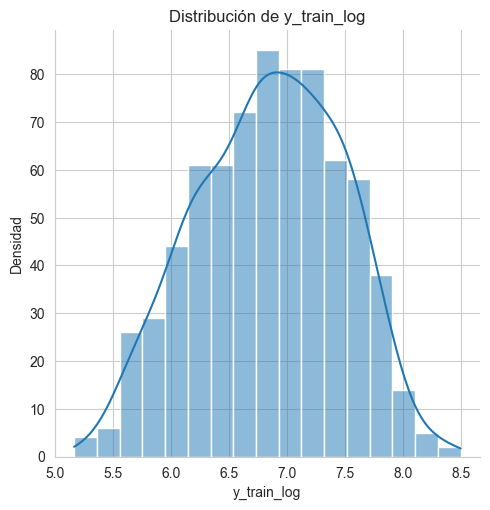

In [22]:
# Visualizar la distribución de y_train_log
sns.displot(y_train_log, kde=True)  # kde=True añade la línea de densidad
plt.title('Distribución de y_train_log')
plt.xlabel('y_train_log')
plt.ylabel('Densidad')
plt.show()

In [23]:
X_train_improved.head()

,Inches,Ram,Weight,Resolution,Memory_SSD,Memory_HDD,Cpu_Cores,Cpu_Frequency,Gpu_Model,Cpu_Family_Intel,Cpu_Series_i3,Cpu_Series_i5,Cpu_Series_i7,Cpu_Series_ryzen 1,Gpu_Brand_Intel,Gpu_Brand_NVIDIA,Gpu_Family_HD Graphics,Gpu_Family_Iris,Gpu_Family_Other,Gpu_Family_Radeon
0,12.5,4,1.20,2073600.0,0.0,0.0,0,0.9,515,True,False,False,False,False,True,False,True,False,False,False
1,17.3,8,3.20,2073600.0,262144.0,1024.0,0,3.2,580,False,False,False,False,True,False,False,False,False,False,True
2,15.6,4,1.85,2073600.0,0.0,1024.0,0,2.7,620,True,False,False,True,False,True,False,True,False,False,False
3,13.3,16,1.29,5760000.0,512.0,0.0,0,2.5,640,True,False,False,True,False,True,False,False,True,False,False
4,15.6,4,2.32,2073600.0,0.0,0.0,0,2.5,520,True,False,False,True,False,True,False,True,False,False,False


Entrenando modelo: Random Forest...
Entrenando modelo: Gradient Boosting...
Entrenando modelo: XGBoost...
Tabla de Importancia de Características:
                        Random Forest  Gradient Boosting   XGBoost  \
Ram                          0.483608           0.358986  0.328329   
Memory_SSD                   0.115695           0.210052  0.090926   
Weight                       0.137374           0.098597  0.024964   
Cpu_Series_i7                0.025845           0.071481  0.123026   
Cpu_Frequency                0.079459           0.077179  0.039981   
Resolution                   0.035734           0.053265  0.038408   
Gpu_Model                    0.040576           0.044257  0.034253   
Gpu_Family_Radeon            0.005738           0.009251  0.099889   
Cpu_Series_i5                0.015808           0.019076  0.052852   
Gpu_Family_Other             0.014979           0.018585  0.047359   
Inches                       0.022617           0.023835  0.017324   
Gpu_Brand_Int

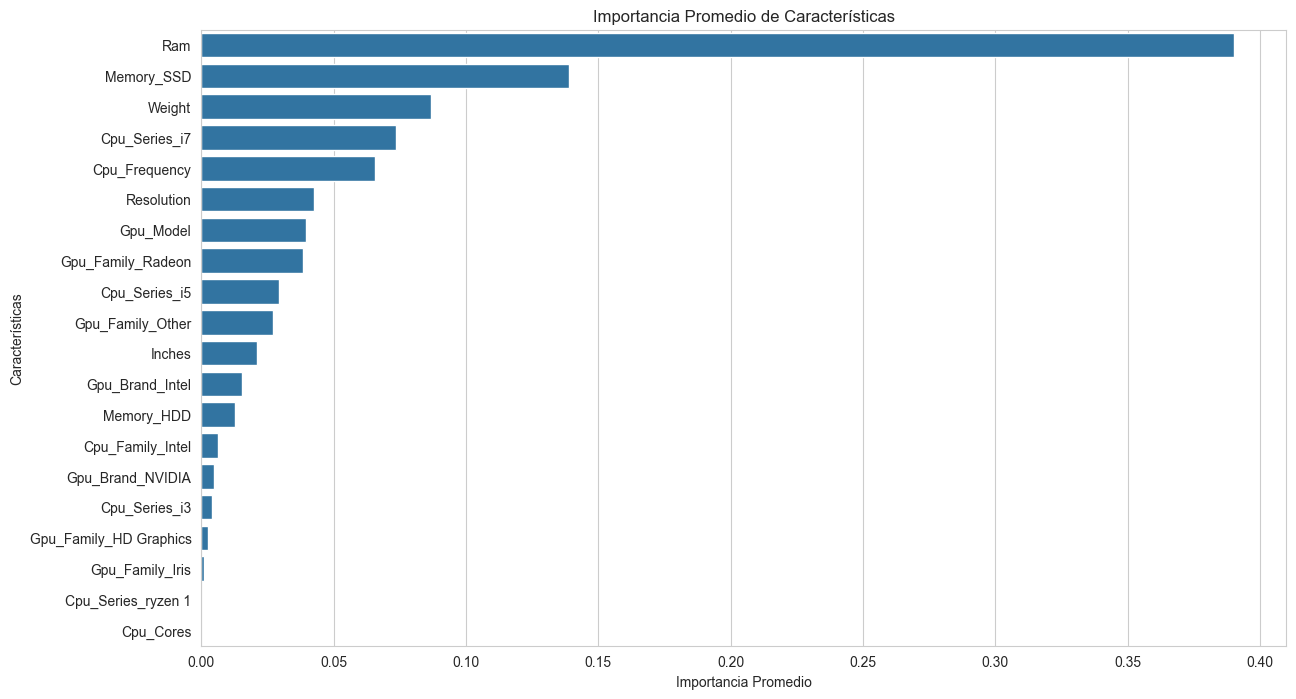

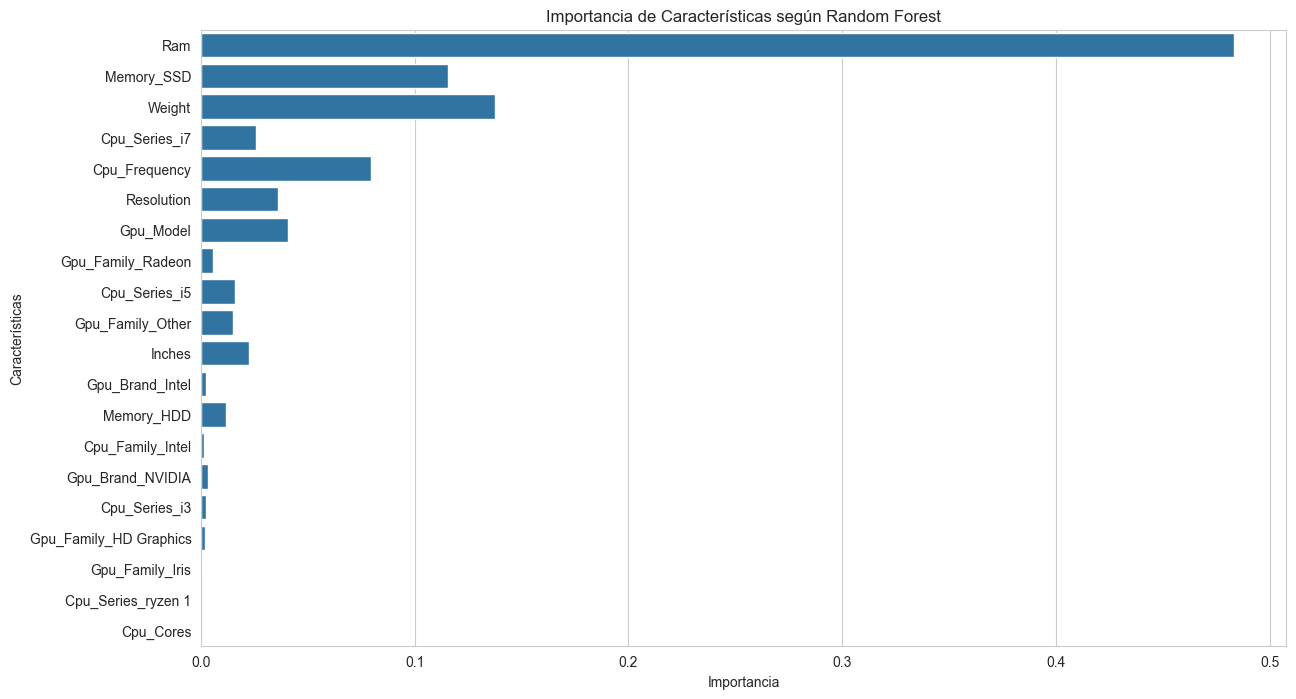

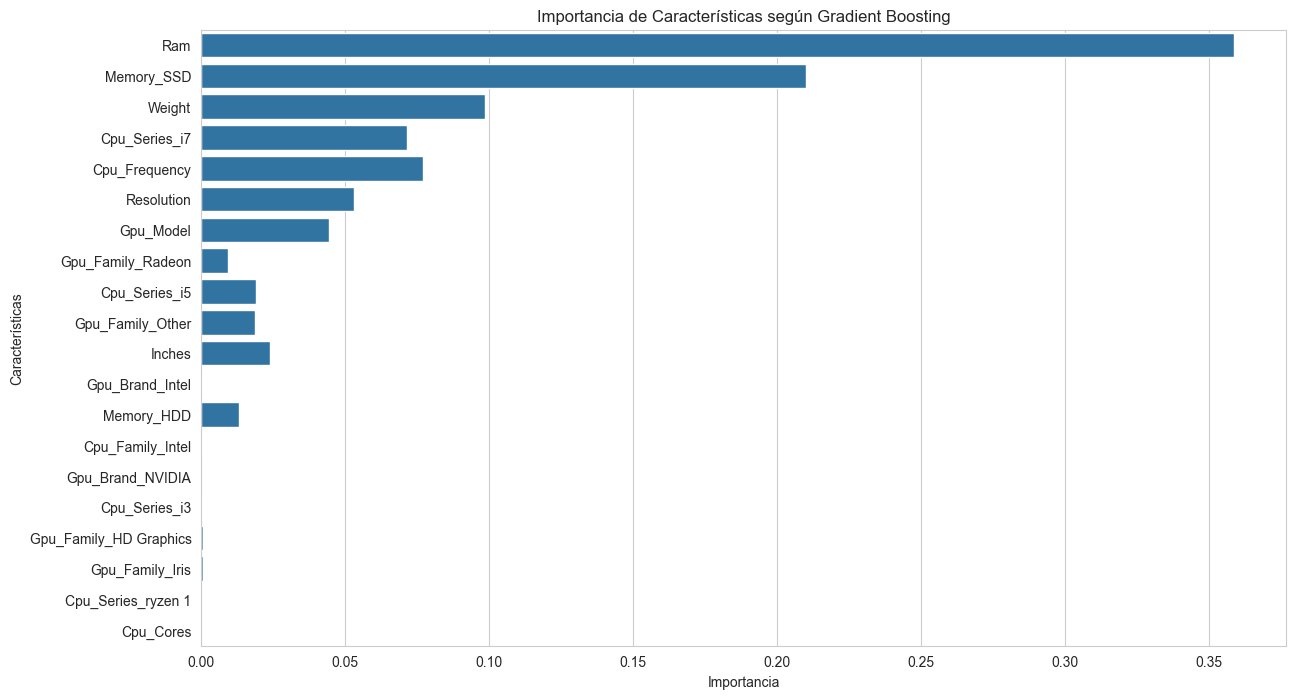

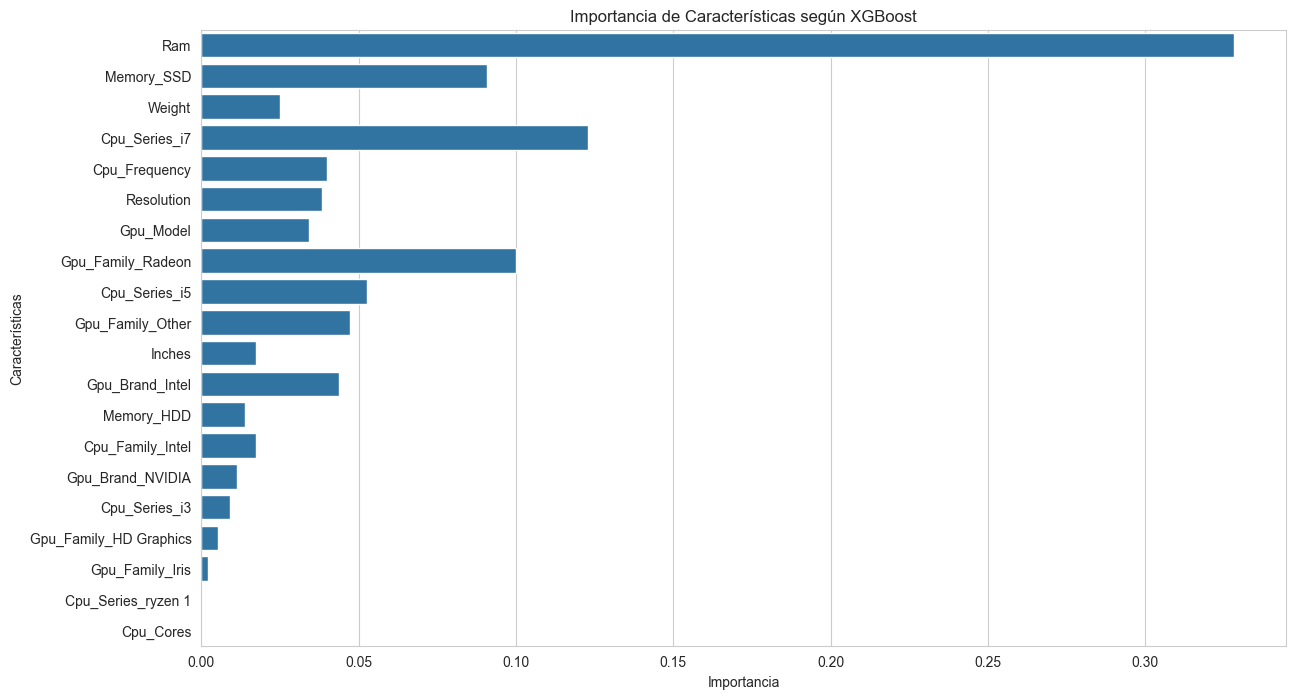

In [24]:
# Definir modelos a usar
models = {
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_jobs=-1)
}

# Crear un DataFrame para almacenar las importancias de características
feature_importances = pd.DataFrame(index=X_train_improved.columns)

# Iterar sobre los modelos para calcular importancias
for model_name, model in models.items():
    print(f"Entrenando modelo: {model_name}...")
    model.fit(X_train_improved, y_train)  # Entrenar modelo
    
    # Obtener importancias de características y agregarlas a la tabla
    feature_importances[model_name] = model.feature_importances_

# Calcular el promedio de importancias
feature_importances['Average Importance'] = feature_importances.mean(axis=1)

# Ordenar las características por su importancia promedio
feature_importances = feature_importances.sort_values(by='Average Importance', ascending=False)

# Mostrar la tabla de importancias
print("Tabla de Importancia de Características:")
print(feature_importances)

# Visualización de importancias
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={'index': 'Feature'}, inplace=True)

plt.figure(figsize=(14, 8))

# Crear un gráfico por modelo
sns.barplot(data=feature_importances, x='Average Importance', y='Feature', orient='h')
plt.title("Importancia Promedio de Características")
plt.xlabel("Importancia Promedio")
plt.ylabel("Características")
plt.show()

# Gráfico separado por modelo
for model_name in models.keys():
    plt.figure(figsize=(14, 8))
    sns.barplot(data=feature_importances, x=model_name, y='Feature', orient='h')
    plt.title(f"Importancia de Características según {model_name}")
    plt.xlabel("Importancia")
    plt.ylabel("Características")
    plt.show()

## Definir modelos mas adecuados para predecir y evaluar su rendimiento

## Predicciones y archivo salida

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Definir los modelos y sus hiperparámetros
models_params = {
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42, n_jobs=-1),
        "params": {
            "n_estimators": [100, 150],
            "max_depth": [6, 8, 10],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 3],
        },
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 150, 200],
            "learning_rate": [0.01, 0.05, 0.08],
            "max_depth": [6, 8],
            "subsample": [0.8, 1.0],
        },
    },
    "XGBoost": {
        "model": XGBRegressor(random_state=42, n_jobs=-1, eval_metric='logloss'),
        "params": {
            "n_estimators": [100, 150, 200, 250],
            "max_depth": [6, 8],
            "learning_rate": [0.05, 0.08, 1.0],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.8],
        },
    },
    "ElasticNet": {
        "model": ElasticNet(random_state=42),
        "params": {
            "alpha": [0.01, 0.1, 1.0, 10.0],  # Regularización L1 y L2
            "l1_ratio": [0.1, 0.5, 0.9],  # Mezcla entre L1 y L2
            "max_iter": [1000, 5000],  # Iteraciones máximas
        },
    },
    "SVR": {
        "model": SVR(),
        "params": {
            "C": [0.1, 1, 10],  # Regularización
            "epsilon": [0.01, 0.1, 0.2],  # Margen de error
            "kernel": ["linear", "rbf"],  # Tipo de kernel
        },
    },
}

# Diccionario para almacenar resultados
results = {}

# Iterar sobre los modelos y realizar GridSearchCV
for model_name, config in models_params.items():
    print(f"Optimizing {model_name}...")
    grid_search = GridSearchCV(
        estimator=config["model"],
        param_grid=config["params"],
        cv=5,
        scoring="neg_mean_absolute_error",
        n_jobs=-1,
        verbose=2,
    )
    grid_search.fit(X_train_split, y_train_log)
    
    # Obtener el mejor modelo y evaluar
    best_model = grid_search.best_estimator_
    y_pred_log = best_model.predict(X_val_split)
    y_pred = np.expm1(y_pred_log)  # Invertir logaritmo para obtener valores originales
    mae = mean_absolute_error(y_val_split, y_pred)
    
    print(f"Mejores parámetros para {model_name}: {grid_search.best_params_}")
    print(f"MAE para {model_name}: {mae}")
    
    # Guardar resultados
    results[model_name] = {
        "best_model": best_model,
        "best_params": grid_search.best_params_,
        "mae": mae,
    }

# Mostrar el modelo con mejor rendimiento
best_model_name = min(results, key=lambda x: results[x]["mae"])
print(f"El mejor modelo es {best_model_name} con un MAE de {results[best_model_name]['mae']}")


Optimizing Random Forest...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Mejores parámetros para Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
MAE para Random Forest: 198.65729720957094
Optimizing Gradient Boosting...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros para Gradient Boosting: {'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
MAE para Gradient Boosting: 177.49914813098158
Optimizing XGBoost...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores parámetros para XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
MAE para XGBoost: 175.8986734825926
Optimizing ElasticNet...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros para ElasticNet: {'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 1000}
MAE para ElasticNet: 288.4280219110898
Optimizin

In [26]:
# Predecir en el conjunto de prueba
y_pred_test_log = best_model.predict(X_test_improved)

# Invertir la transformación logarítmica para obtener los valores de precio originales
y_pred_test = np.expm1(y_pred_test_log)

# Crear un DataFrame con los resultados
output_df = test_df[['id']]
output_df['Price_euros'] = y_pred_test

# Guardar el archivo CSV de salida
output_df.to_csv('laptop_price_predictions.csv', index=False)
print('Archivo de predicciones guardado como laptop_price_predictions.csv')


Archivo de predicciones guardado como laptop_price_predictions.csv


C:\Users\mikel\AppData\Local\Temp\ipykernel_12852\3630082334.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df['Price_euros'] = y_pred_test
